Text(0.5, 1.0, 'Transformed')

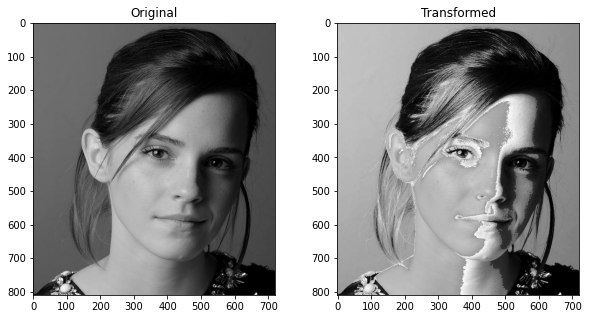

In [5]:
#1 

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

x_1 = np.array([i for i in range(0,50)]).astype(np.uint8)
x_2 = np.array([(100+155/100*(i-50)) for i in range(50,150)]).astype(np.uint8)
x_3 = np.array([i for i in range(150,256)]).astype(np.uint8)
#xa = np.array([i for i in range(0,256)]).astype(np.uint8)
x= np.concatenate((x_1,x_2,x_3),axis=0).astype(np.uint8)
img = cv.imread('emma_gray.jpg')
new_img = cv.LUT(img,x)

fig , ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(new_img)
ax[1].set_title('Transformed')




### 2

Text(0.5, 1.0, 'Gray')

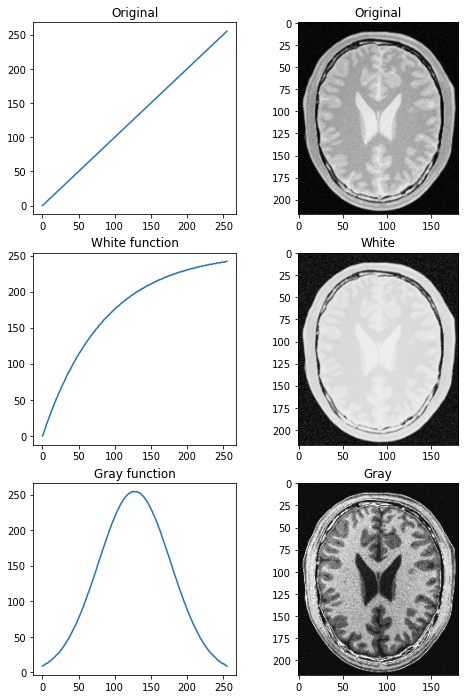

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

x = np.array([i for i in range(0,256)]).astype(np.uint8)
img = cv.imread('brain_proton_density_slice.png')

#function for white
f_w = np.array([(1-1/np.exp(3*i/255))*255 for i in range(0,256)]).astype(np.uint8)
#print(f_w)
img_w = cv.LUT(img,f_w)
#function for grey
f_g = np.array([(np.exp(-13*(i/255-0.5)**2))*255 for i in range(0,256)]).astype(np.uint8)
img_g = cv.LUT(img,f_g)

fig, ax = plt.subplots(3,2, figsize= (8,12))
ax[0,0].plot(x,x)
ax[0,0].set_title('Original')
ax[1,0].plot(x,f_w)
ax[1,0].set_title('White function')
ax[2,0].plot(x,f_g)
ax[2,0].set_title('Gray function')

ax[0,1].imshow(img)
ax[0,1].set_title('Original')
ax[1,1].imshow(img_w)
ax[1,1].set_title('White')
ax[2,1].imshow(img_g)
ax[2,1].set_title('Gray')


### 3 

Text(0.5, 1.0, 'Gamma corrected histogram')

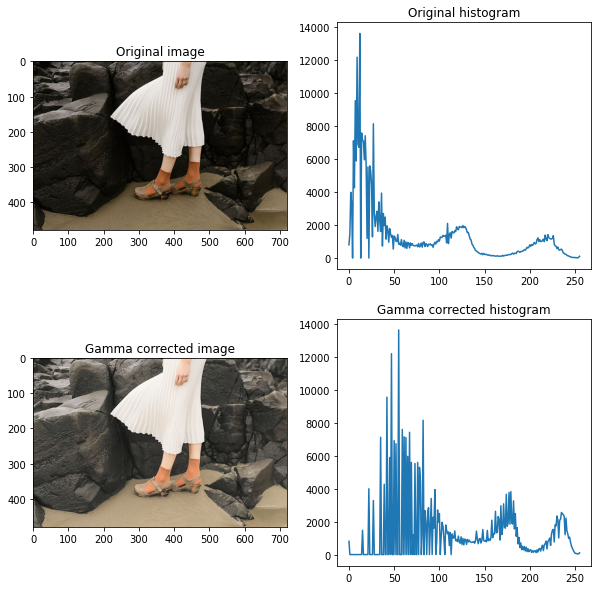

In [16]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('highlights_and_shadows.jpg')
assert img is not None

lab_img = cv.cvtColor(img, cv.COLOR_BGR2LAB)
(L,A,B) = cv.split(lab_img)

gamma = 0.5
t = np.array([(((i/255)**gamma)*255) for i in range (0,256)]).astype(np.uint8)
new_L = cv.LUT(L,t)
corrected_img = cv.merge([new_L,A,B])

fig , ax = plt.subplots(2,2, figsize=(10,10))

ax[0][0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0][0].set_title("Original image")

ax[1][0].imshow(cv.cvtColor(corrected_img, cv.COLOR_LAB2RGB))
ax[1][0].set_title("Gamma corrected image")

ax[0][1].plot(cv.calcHist([L],[0],None,[256],[0,256]))
ax[0][1].set_title("Original histogram")

ax[1][1].plot(cv.calcHist([new_L],[0],None,[256],[0,256]))
ax[1][1].set_title("Gamma corrected histogram")


### 4

(-0.5, 499.5, 499.5, -0.5)

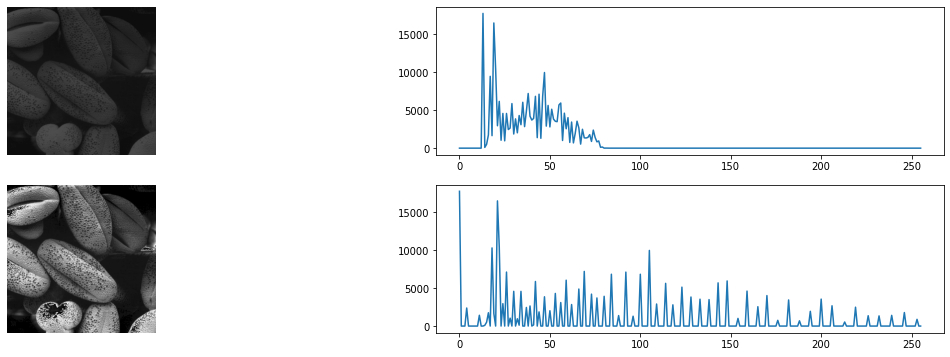

In [38]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE)
assert img is not None

def equalize(img):

    hist = cv.calcHist([img],[0],None, [256], [0,256])  #original histogram
    max_id =0
    max_num=0
    for i in range (0,256):
        if hist[i]> max_num:
            max_num= hist[i]
            max_id = i

    look_up= np.array([0 for i in range (0,256)])
    for p in range (10,246):
        if p< max_id:
            new_val = p-((max_id - p)**2)/20
            if new_val>=0:
                look_up[p] = round(new_val)
        elif p> max_id:
            new_val = p+((p- max_id)**2)/20
            if new_val>=0:
                look_up[p] = round(new_val) 
    a = np.array([i for i in range (0,256)])
    img_2 =cv.LUT(img,look_up).astype(np.uint8)
    return(img_2)

img_eq= equalize(img)

hist_1 = cv.calcHist([img], [0], None, [256], [0,256])
hist_2 = cv.calcHist([img_eq], [0], None, [256], [0,256])

fig, ax = plt.subplots(2,2,figsize = (20,6))


ax[0][0].imshow(cv.cvtColor(img, cv.COLOR_GRAY2RGB))
ax[0][0].axis('off')
ax[0][1].plot(hist_1)
ax[1][0].imshow(cv.cvtColor(img_eq.astype(np.uint8), cv.COLOR_GRAY2RGB))
ax[1][1].plot(hist_2)
ax[1][0].axis('off')


### 5

### 6

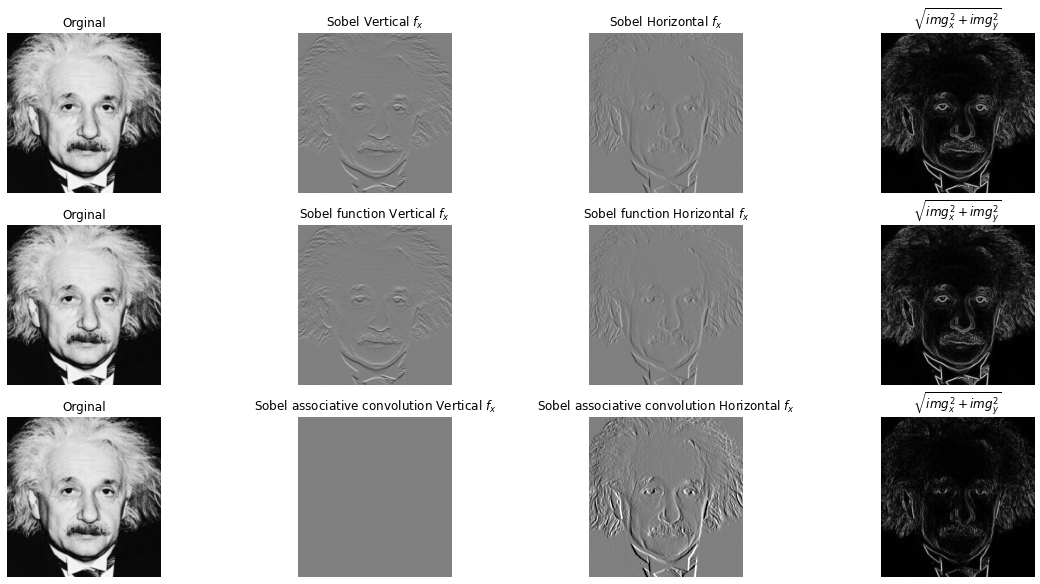

In [55]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity

img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype('float32')
assert img is not None

sobel_v = np.array([[1,2,1],[0,0,0],[-1,-2,-1]], dtype = np.float32)
img_v = cv.filter2D(img,-1,sobel_v)

sobel_h = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], dtype = np.float32)
img_h = cv.filter2D(img,-1,sobel_h)

gradient_img = np.sqrt(img_v**2 + img_h**2)



def sobel(img, kernel):

    #getting the dimentions of image and kernal
    (i_y , i_x) = img.shape[:2]
    (k_y , k_x) = kernel.shape[:2]

    # make empty array for output image
    # "border" :- borders of input image
    border = (k_x-1)//2
    img = cv.copyMakeBorder(img, border, border, border, border,cv.BORDER_REPLICATE)
    output = np.zeros((i_y,i_x), dtype = "float32")

    #loop over the image (sliding kernal)
    for y in np.arange(border, i_y + border):
        for x in np.arange(border, i_x + border):

            #extract the rrgion of interest of the image
            ROI = img[y - border:y + border + 1, x - border:x + border + 1]

            #convolution
            con = (ROI* kernel).sum()

            #store the new value in output
            output[y-border, x-border] = con
    
    # rescale the output image to be in the range [0,255]
    #output = rescale_intensity(output, in_range=(0, 255))
    #output = (output * 255).astype("uint8")

    return output

img_v_2 = sobel(img, sobel_v)
img_h_2 = sobel(img, sobel_h)
gradient_img2= np.sqrt((img_v_2)**2 + (img_h_2)**2)


# c
k_1=  np.array([[1],[2],[1]])
k_2 = np.array([[1,0,-1]])
trans_k_1=k_1.T
trans_k_2=k_2.T

img_v_3 = sobel(sobel(img,trans_k_2), trans_k_1)
img_h_3 = sobel(sobel(img,k_1), k_2)
gradient_img3= np.sqrt((img_v_3)**2 + (img_h_3)**2)



fig,ax = plt.subplots (3,4,figsize = (20,10))
ax[0,0].imshow(img,cmap='gray',vmin = 0 ,vmax = 255)
ax[0,0].set_title('Orginal')
ax[0,1].imshow(img_v,cmap='gray',vmin = -1020 ,vmax =1020)
ax[0,1].set_title(r'Sobel Vertical $f_x$')
ax[0,2].imshow(img_h,cmap='gray',vmin = -1020 ,vmax =1020)
ax[0,2].set_title(r'Sobel Horizontal $f_x$')
ax[0,3].set_title('$\sqrt{img_x^2+img_y^2}$')
ax[0,3].imshow(gradient_img, cmap = 'gray')

ax[1,0].imshow(img,cmap='gray',vmin = 0 ,vmax = 255)
ax[1,0].set_title('Orginal')
ax[1,1].imshow(img_v_2,cmap='gray',vmin = -1020 ,vmax =1020)
ax[1,1].set_title(r'Sobel function Vertical $f_x$')
ax[1,2].imshow(img_h_2,cmap='gray',vmin = -1020 ,vmax =1020)
ax[1,2].set_title(r'Sobel function Horizontal $f_x$')
ax[1,3].set_title('$\sqrt{img_x^2+img_y^2}$')
ax[1,3].imshow(gradient_img2, cmap = 'gray')

ax[2,0].imshow(img,cmap='gray',vmin = 0 ,vmax = 255)
ax[2,0].set_title('Orginal')
ax[2,1].imshow(img_v_3,cmap='gray',vmin = -1020 ,vmax =1020)
ax[2,1].set_title(r'Sobel associative convolution Vertical $f_x$')
ax[2,2].imshow(img_h_3,cmap='gray',vmin = -1020 ,vmax =1020)
ax[2,2].set_title(r'Sobel associative convolution Horizontal $f_x$')
ax[2,3].set_title('$\sqrt{img_x^2+img_y^2}$')
ax[2,3].imshow(gradient_img3, cmap = 'gray')


for i in range(3):
    for j in range (4):
        ax[i,j].axis('off')
plt.show()


### 7

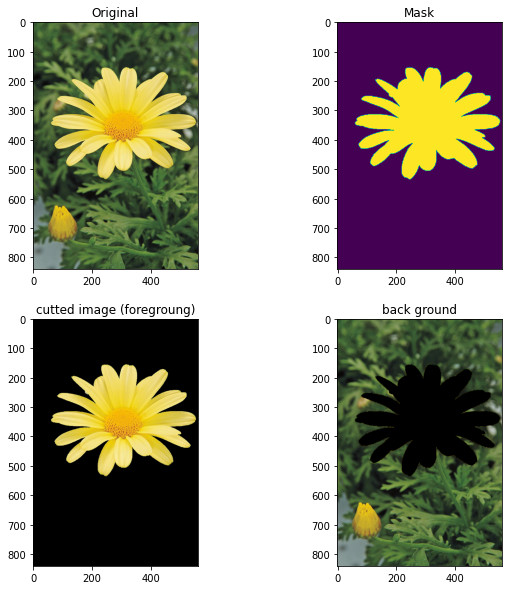

In [66]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('daisy.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
mask = np.zeros(img.shape[:2],np.uint8)
bgd_Model = np.zeros((1,65),np.float64)
fgd_Model = np.zeros((1,65),np.float64)
rect = (25,125,530,450)
cv.grabCut(img,mask,rect,bgd_Model,fgd_Model,5,cv.GC_BGD ) #cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

#cutted image
img_cut = img*mask2[:,:,np.newaxis]
#background
back_gnd = img - img_cut

#plot

fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(img)
ax[0,1].imshow(mask2)
ax[1,0].imshow(img_cut)
ax[1,1].imshow(back_gnd)

ax[0,0].set_title('Original')
ax[0,1].set_title('Mask')
ax[1,0].set_title('cutted image (foregroung)')
ax[1,1].set_title('back ground')

plt.show()


[]

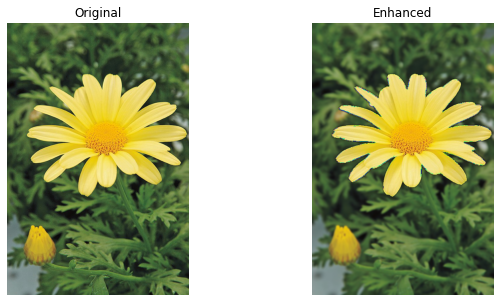

In [83]:
# enhancing

kernel_size = 11
sigma = 2

blur_background = cv.GaussianBlur(back_gnd, (kernel_size,kernel_size),sigma)
img_enhanced = blur_background + img_cut

fig, ax_1 = plt.subplots(1,2, figsize= (10,5))
ax_1[0].imshow(img)
ax_1[0].set_title('Original')
ax_1[0].axis('off')

ax_1[1].imshow(img_enhanced)
ax_1[1].set_title('Enhanced')
ax_1[1].axis('off')

plt.plot()